In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from src.util import color_code_cells, non_boundary_convexity_two_types

In [9]:
with open("saves/vol_per_scan_honeycomb/null_model_sweep_beta1_0_1.pkl", "rb") as f:
    GRIDS_NULL, TYPES_NULL, beta_2_null = pickle.load(f)
with open("saves/vol_per_scan_honeycomb/perimeter_sweep_beta1_0_1.pkl", "rb") as f:
    GRIDS_PER, TYPES_PER, beta_2 = pickle.load(f)
with open("saves/vol_per_scan_honeycomb/volume_sweep_lambda1_0_1.pkl", "rb") as f:
    GRID_VOL, TYPES_VOL, lambda_2 = pickle.load(f)
with open("saves/vol_per_scan_honeycomb/null_model_sweep_beta1_0_1_evenspread.pkl", "rb") as f:
    GRIDS_NULL_EVEN, TYPES_NULL_EVEN, beta_2_null_even = pickle.load(f)

with open("saves/vol_per_scan_hex/null_model_sweep_beta1_0_1.pkl", "rb") as f:
    GRIDS_NULL_HEX, TYPES_NULL_HEX, beta_2_null_hex = pickle.load(f)
with open("saves/vol_per_scan_hex/perimeter_sweep_beta1_0_1.pkl", "rb") as f:
    GRIDS_PER_HEX, TYPES_PER_HEX, beta_2_hex = pickle.load(f)
with open("saves/vol_per_scan_hex/volume_sweep_lambda1_0_1.pkl", "rb") as f:
    GRID_VOL_HEX, TYPES_VOL_HEX, lambda_2_hex = pickle.load(f)
with open("saves/vol_per_scan_hex/null_model_sweep_beta1_0_1_evenspread.pkl", "rb") as f:
    GRIDS_NULL_EVEN_HEX, TYPES_NULL_EVEN_HEX, beta_2_null_even_hex = pickle.load(f)


In [3]:
def convexity_analysis(GRIDS, TYPES):
    CONVEXITY_CELL_TYPE_1 = []
    CONVEXITY_CELL_TYPE_2 = []
    for i in range(len(GRIDS)):  # over parameter sets
        convexity_type_1 = []
        convexity_type_2 = []
        for j in range(len(GRIDS[i])): # over repeats for each parameter set
            convexity_1, convexity_2, _ = non_boundary_convexity_two_types(GRIDS[i][j], TYPES[i][j])
            convexity_type_1.extend(convexity_1)
            convexity_type_2.extend(convexity_2)
        CONVEXITY_CELL_TYPE_1.append(convexity_type_1)
        CONVEXITY_CELL_TYPE_2.append(convexity_type_2)
    return CONVEXITY_CELL_TYPE_1, CONVEXITY_CELL_TYPE_2

def mean_error(CONVEXITY_CELL_TYPE_1, CONVEXITY_CELL_TYPE_2, param_values):
    mean_1, error_1 = [], []
    mean_2, error_2 = [], []
    median_1, median_2 = [], []

    for i in range(len(param_values)):
        mean_1.append(np.mean(CONVEXITY_CELL_TYPE_1[i]))
        mean_2.append(np.mean(CONVEXITY_CELL_TYPE_2[i]))
        error_1.append(np.std(CONVEXITY_CELL_TYPE_1[i]) / np.sqrt(len(CONVEXITY_CELL_TYPE_1[i])))
        error_2.append(np.std(CONVEXITY_CELL_TYPE_2[i]) / np.sqrt(len(CONVEXITY_CELL_TYPE_2[i])))
        median_1.append(np.median(CONVEXITY_CELL_TYPE_1[i]))
        median_2.append(np.median(CONVEXITY_CELL_TYPE_2[i]))
    return (mean_1, error_1, median_1), (mean_2, error_2, median_2)

# Caculate the Convexity 

In [21]:
con_1_per, con_2_per = convexity_analysis(GRIDS_PER, TYPES_PER)
con_1_vol, con_2_vol = convexity_analysis(GRID_VOL, TYPES_VOL)
con_1_null, con_2_null = convexity_analysis(GRIDS_NULL, TYPES_NULL)
con_1_null_even, con_2_null_even = convexity_analysis(GRIDS_NULL_EVEN, TYPES_NULL_EVEN)

con_1_per_hex, con_2_per_hex = convexity_analysis(GRIDS_PER_HEX, TYPES_PER_HEX)
con_1_vol_hex, con_2_vol_hex = convexity_analysis(GRID_VOL_HEX, TYPES_VOL_HEX)
con_1_null_hex, con_2_null_hex = convexity_analysis(GRIDS_NULL_HEX, TYPES_NULL_HEX)
con_1_null_even_hex, con_2_null_even_hex = convexity_analysis(GRIDS_NULL_EVEN_HEX, TYPES_NULL_EVEN_HEX)

In [105]:
con_null = [c1 + c2 for c1, c2 in zip(con_1_null, con_2_null)]
con_null_even = [c1 + c2 for c1, c2 in zip(con_1_null_even, con_2_null_even)]
con_null_hex = [c1 + c2 for c1, c2 in zip(con_1_null_hex, con_2_null_hex)]
con_null_even_hex = [c1 + c2 for c1, c2 in zip(con_1_null_even_hex, con_2_null_even_hex)]

mean_null = [np.mean(c) for c in con_null]
mean_null_even = [np.mean(c) for c in con_null_even]
mean_null_hex = [np.mean(c) for c in con_null_hex]
mean_null_even_hex = [np.mean(c) for c in con_null_even_hex]
error_null = [np.std(c) / np.sqrt(len(c)) for c in con_null]
error_null_even = [np.std(c) / np.sqrt(len(c)) for c in con_null_even]
error_null_hex = [np.std(c) / np.sqrt(len(c)) for c in con_null_hex]
error_null_even_hex = [np.std(c) / np.sqrt(len(c)) for c in con_null_even_hex]

In [ ]:
(mean_1_per, error_1_per, median_1_per), (mean_2_per, error_2_per, median_2_per) = mean_error(con_1_per, con_2_per, beta_2)
(mean_1_vol, error_1_vol, median_1_vol), (mean_2_vol, error_2_vol, median_2_vol) = mean_error(con_1_vol, con_2_vol, lambda_2)
(mean_1_null, error_1_null, median_1_null), (mean_2_null, error_2_null, median_2_null) = mean_error(con_1_null, con_2_null, beta_2_null)
(mean_1_null_even, error_1_null_even, median_1_null_even), (mean_2_null_even, error_2_null_even, median_2_null_even) = mean_error(con_1_null_even, 
                                                                                                                                  con_2_null_even, 
                                                                                                                                  beta_2_null_even)

(mean_1_per_hex, error_1_per_hex, median_1_per_hex), (mean_2_per_hex, error_2_per_hex, median_2_per_hex) = mean_error(con_1_per_hex, con_2_per_hex, beta_2_hex)
(mean_1_vol_hex, error_1_vol_hex, median_1_vol_hex), (mean_2_vol_hex, error_2_vol_hex, median_2_vol_hex) = mean_error(con_1_vol_hex, con_2_vol_hex, lambda_2_hex)
(mean_1_null_hex, error_1_null_hex, median_1_null_hex), (mean_2_null_hex, error_2_null_hex, median_2_null_hex) = mean_error(con_1_null_hex, con_2_null_hex, beta_2_null_hex)
(mean_1_null_even_hex, error_1_null_even_hex, median_1_null_even_hex), (mean_2_null_even_hex, error_2_null_even_hex, median_2_null_even_hex) = mean_error(con_1_null_even_hex, 
                                                                                                                                          con_2_null_even_hex,  
                                                                                                                                            beta_2_null_even_hex) 

# Plot Stuff

In [6]:
def plot_sweep_configs(GRID, TYPES, param_values, param_1, param_1_name, param_2_name):
    fig, ax = plt.subplots(2, 5, figsize=(30, 15))
    for i in range(5):
        ax[0, i].imshow(color_code_cells(GRID[i][0], TYPES[i][0]))
        ax[0, i].set_title(rf"{param_2_name}: {param_values[i]:.2f} = {param_values[i]/param_1:.0f} $\times$ {param_1_name}", fontsize=20)
        ax[1, i].imshow(color_code_cells(GRID[i+5][0], TYPES[i+5][0]))
        ax[1, i].set_title(rf"{param_2_name}: {param_values[i+5]:.2f} = {param_values[i+5]/param_1:.0f} $\times$ {param_1_name}", fontsize=20)
        ax[0, i].axis('off')
        ax[1, i].axis('off')
    #fig.suptitle("Cell configurations from perimeter constraint sweep", fontsize=35)
    fig.tight_layout()

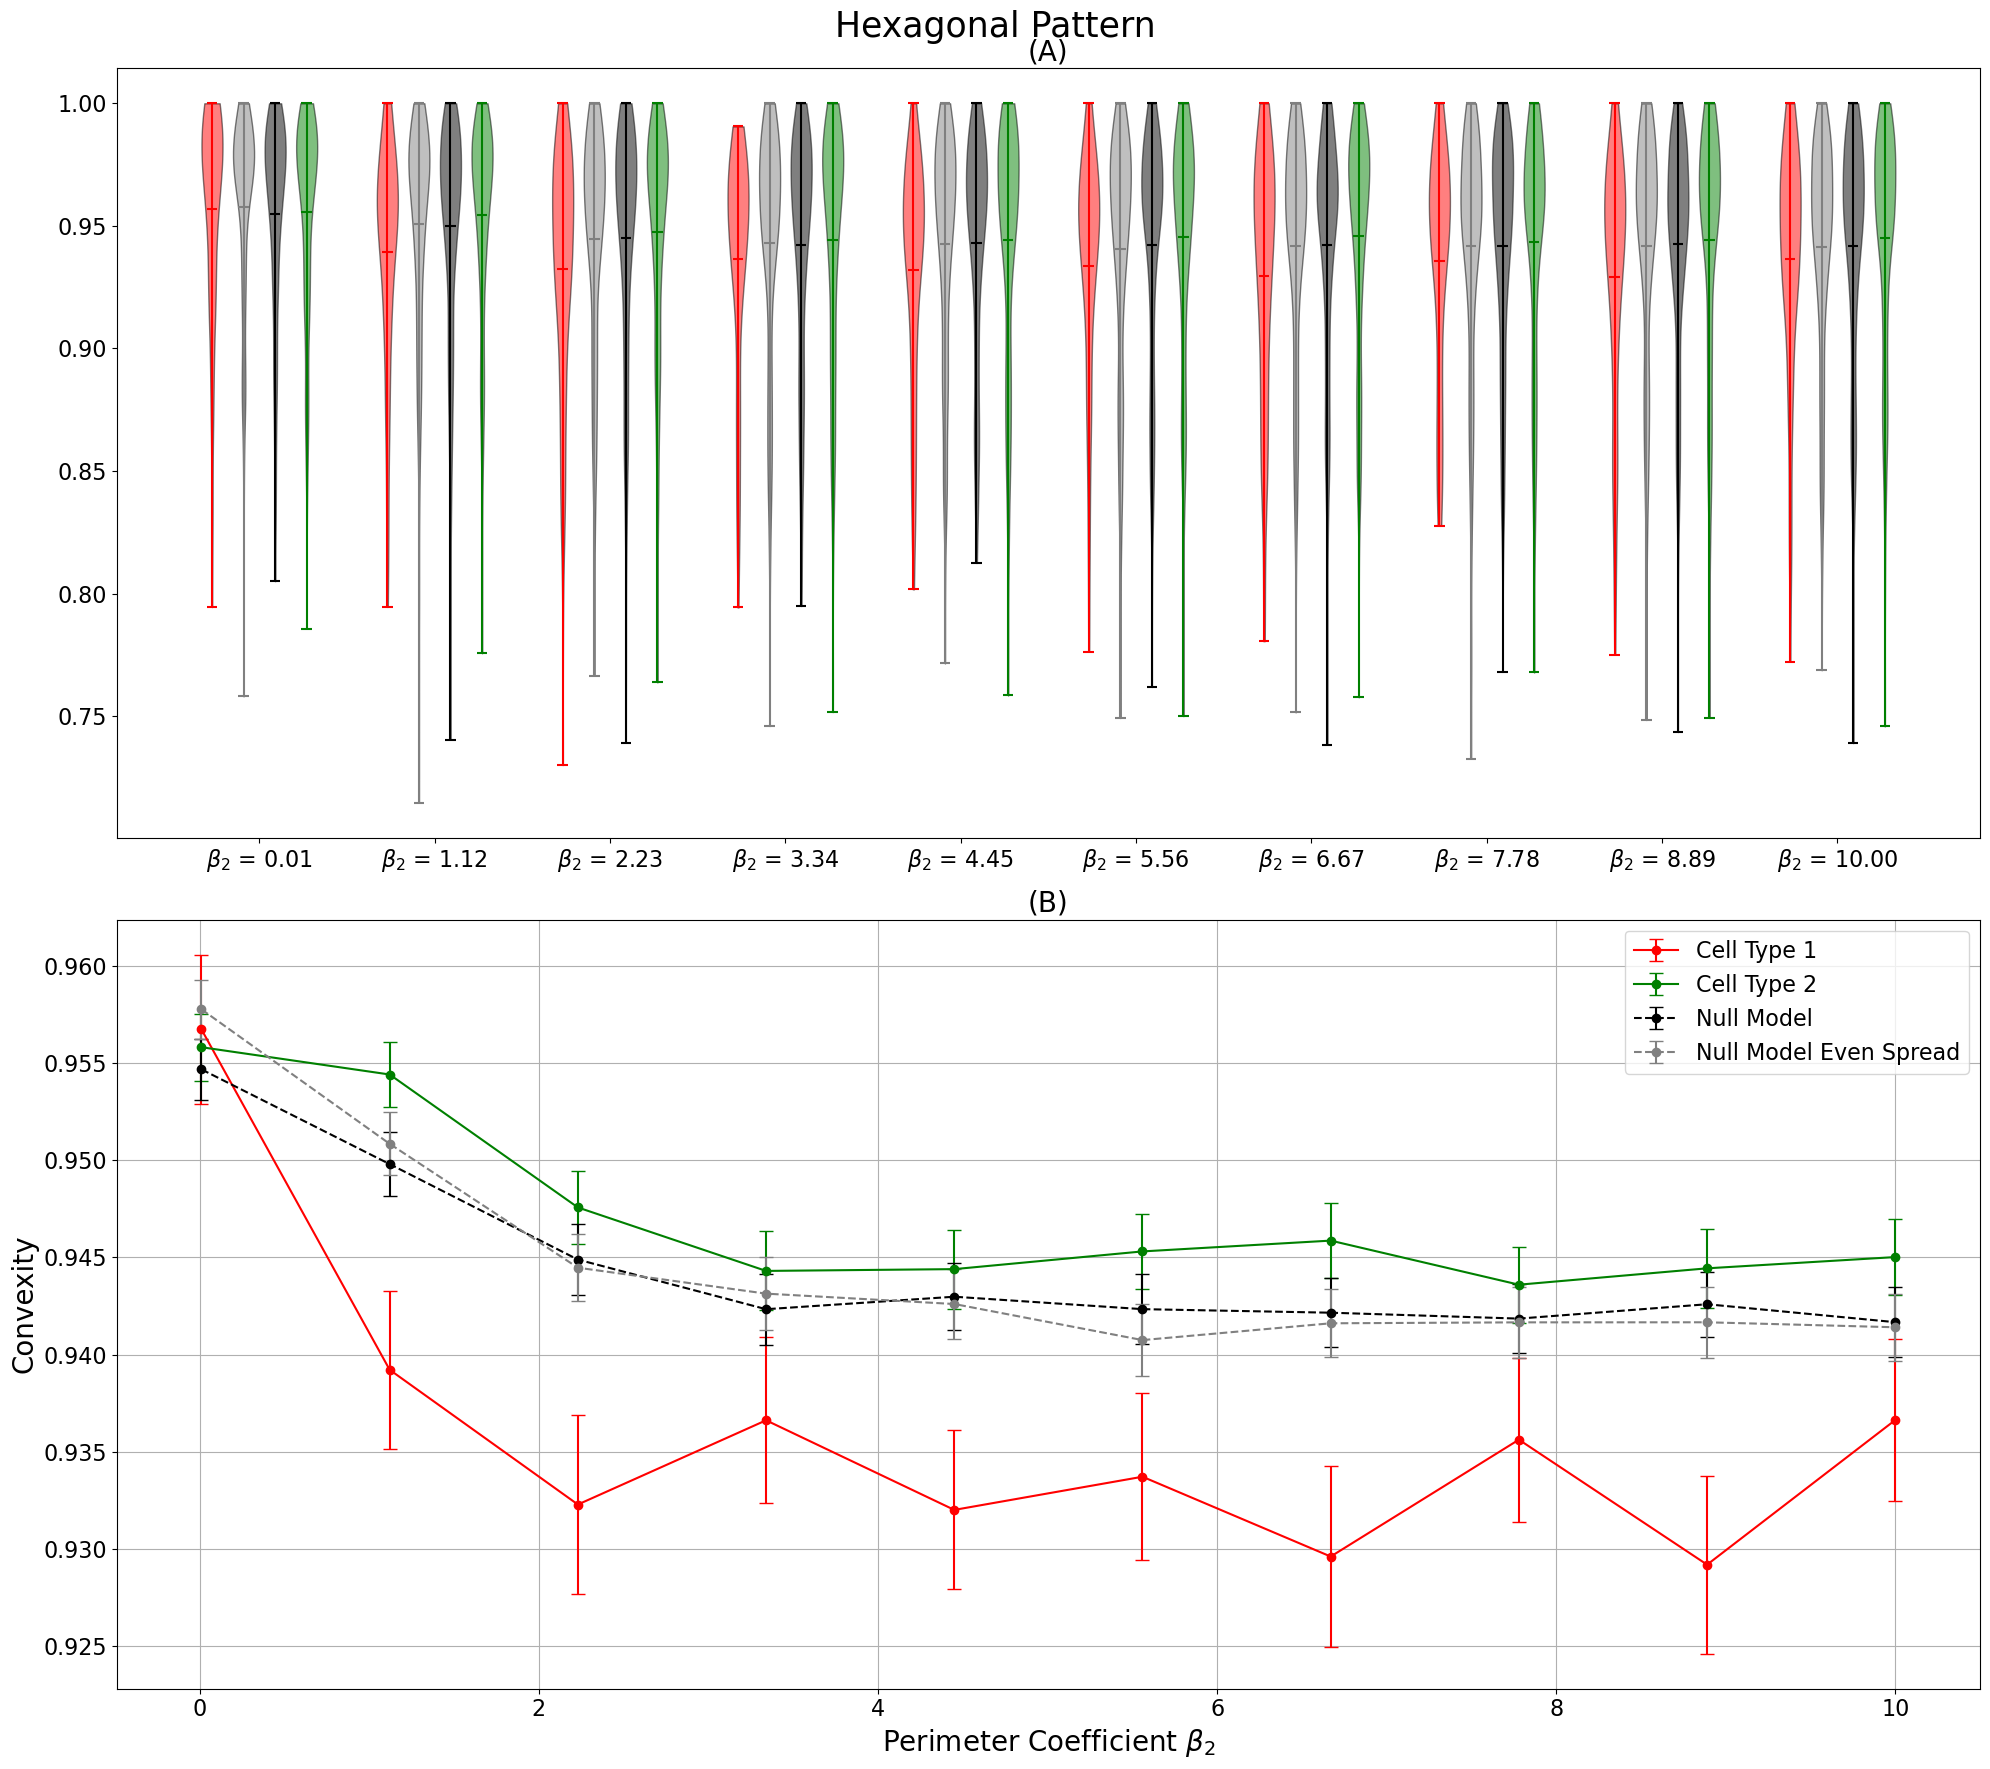

In [110]:
# Hexagonal Pattern 
spread = np.linspace(0, 15, 10)
spacing = 0.3
widths = 0.2
per_labels = [rf"$\beta_2$ = {b:.2f}" for b in beta_2_hex]

fig, ax = plt.subplots(2, 1, figsize=(20, 18))
# Violin part
for i in range(10):
    c1=ax[0].violinplot(con_1_per_hex[i], positions=[spread[i]], widths=widths, showmeans=True)
    c2=ax[0].violinplot(con_2_per_hex[i], positions=[spread[i]+3*spacing], widths=widths, showmeans=True)
    cn=ax[0].violinplot(con_null_hex[i], positions=[spread[i]+2*spacing], widths=widths, showmeans=True)
    cne=ax[0].violinplot(con_null_even_hex[i], positions=[spread[i]+spacing], widths=widths, showmeans=True)

    for pc in c1['bodies']:
        pc.set_facecolor('red')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    for pc in c2['bodies']:
        pc.set_facecolor('green')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    for pc in cn['bodies']:
        pc.set_facecolor('black')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    for pc in cne['bodies']:
        pc.set_facecolor('gray')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    
    for key in ('cmedians', 'cmins', 'cmaxes', 'cbars', 'cmeans'):
        if key in c1:
            c1[key].set_color('red')
        if key in c2:
            c2[key].set_color('green')
        if key in cn or key in cne:
            cn[key].set_color('black')
            cne[key].set_color('gray')
ax[0].set_xticks(spread + 1.5*spacing)
ax[0].set_xticklabels(per_labels)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_title("(A)", fontsize=20)

# Mean and Error Bar part
ax[1].errorbar(beta_2_hex, mean_1_per_hex, yerr=error_1_per_hex, 
               fmt='o-', color='red', label='Cell Type 1', capsize=5)
ax[1].errorbar(beta_2_hex, mean_2_per_hex, yerr=error_2_per_hex, 
               fmt='o-', color='green', label='Cell Type 2', capsize=5)
ax[1].errorbar(beta_2_hex, mean_null_hex, yerr=error_null_hex, 
               fmt='o--', color='black', label='Null Model', capsize=5)
ax[1].errorbar(beta_2_hex, mean_null_even_hex, yerr=error_null_even_hex, 
               fmt='o--', color='gray', label='Null Model Even Spread', capsize=5)
ax[1].legend(fontsize=16)
ax[1].set_xlabel(r'Perimeter Coefficient $\beta_2$', fontsize=20)
ax[1].set_ylabel('Convexity', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].grid(True)
ax[1].set_title("(B)", fontsize=20)
fig.suptitle("Hexagonal Pattern", fontsize=25)
fig.tight_layout()

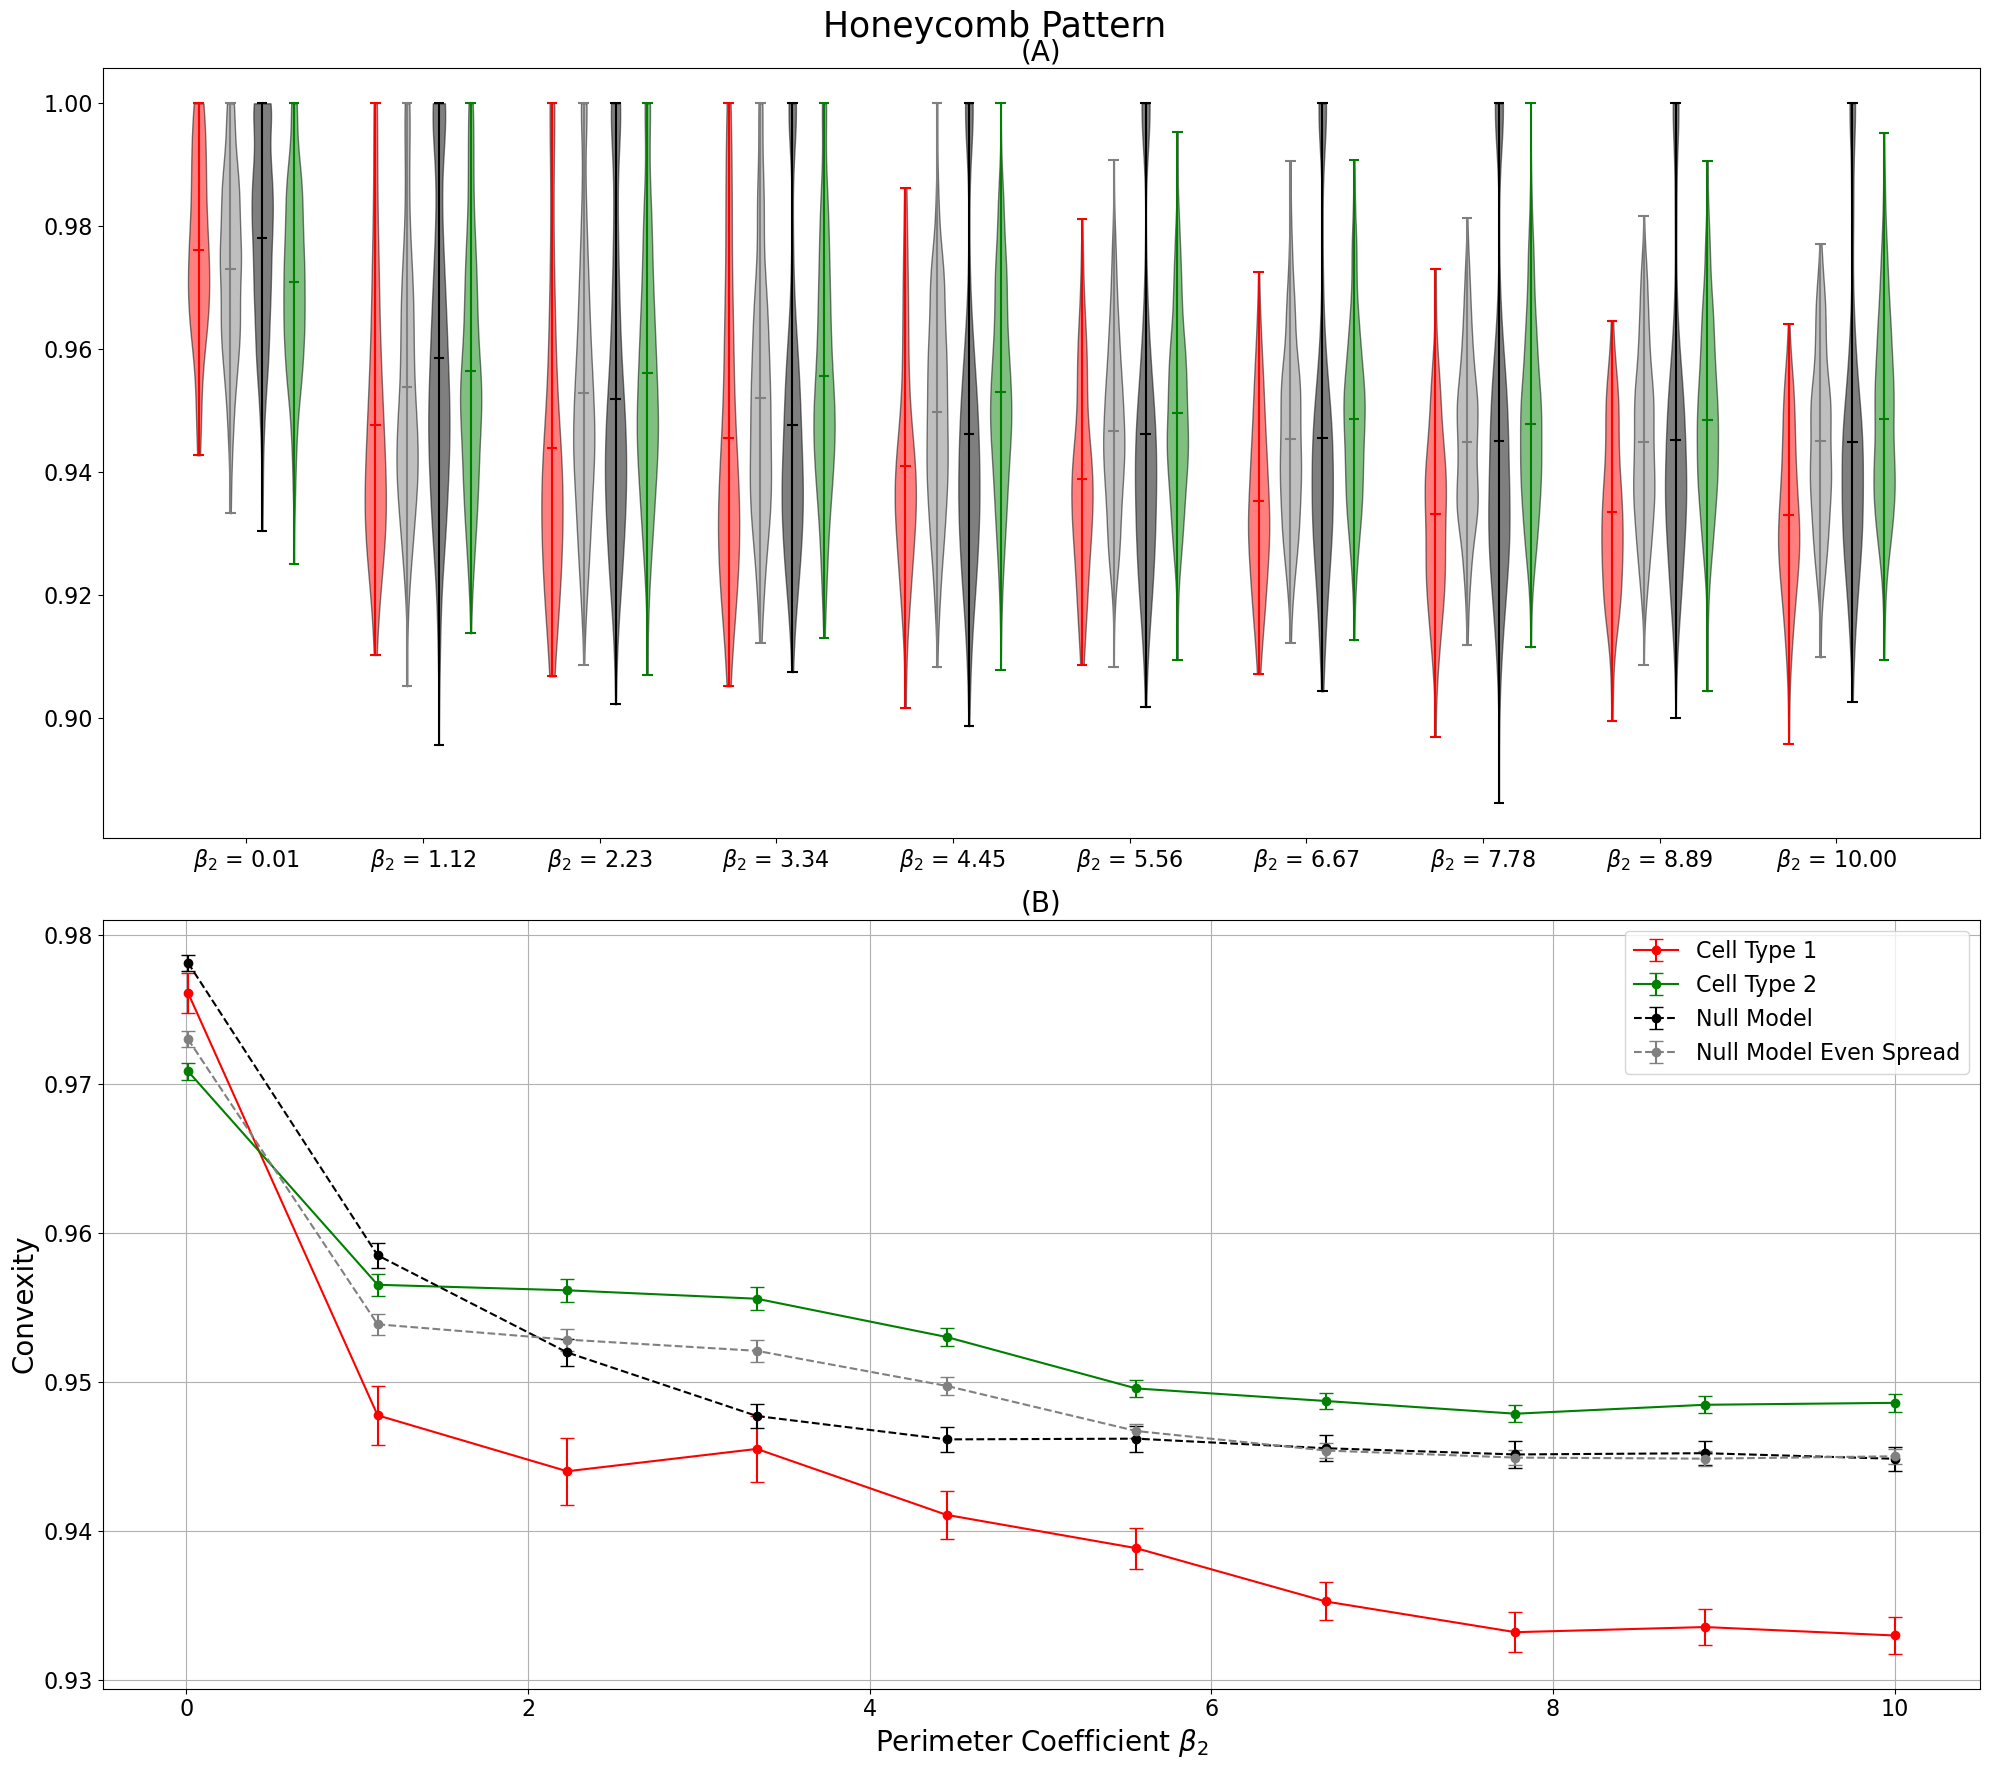

In [111]:
# Honeycomb Pattern 
spread = np.linspace(0, 15, 10)
spacing = 0.3
widths = 0.2
per_labels = [rf"$\beta_2$ = {b:.2f}" for b in beta_2]

fig, ax = plt.subplots(2, 1, figsize=(20, 18))
# Violin part
for i in range(10):
    c1=ax[0].violinplot(con_1_per[i], positions=[spread[i]], widths=widths, showmeans=True)
    c2=ax[0].violinplot(con_2_per[i], positions=[spread[i]+3*spacing], widths=widths, showmeans=True)
    cn=ax[0].violinplot(con_null[i], positions=[spread[i]+2*spacing], widths=widths, showmeans=True)
    cne=ax[0].violinplot(con_null_even[i], positions=[spread[i]+spacing], widths=widths, showmeans=True)

    for pc in c1['bodies']:
        pc.set_facecolor('red')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    for pc in c2['bodies']:
        pc.set_facecolor('green')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    for pc in cn['bodies']:
        pc.set_facecolor('black')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    for pc in cne['bodies']:
        pc.set_facecolor('gray')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    
    for key in ('cmedians', 'cmins', 'cmaxes', 'cbars', 'cmeans'):
        if key in c1:
            c1[key].set_color('red')
        if key in c2:
            c2[key].set_color('green')
        if key in cn or key in cne:
            cn[key].set_color('black')
            cne[key].set_color('gray')
ax[0].set_xticks(spread + 1.5*spacing)
ax[0].set_xticklabels(per_labels)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_title("(A)", fontsize=20)

# Mean and Error Bar part
ax[1].errorbar(beta_2, mean_1_per, yerr=error_1_per, 
               fmt='o-', color='red', label='Cell Type 1', capsize=5)
ax[1].errorbar(beta_2, mean_2_per, yerr=error_2_per, 
               fmt='o-', color='green', label='Cell Type 2', capsize=5)
ax[1].errorbar(beta_2, mean_null, yerr=error_null, 
               fmt='o--', color='black', label='Null Model', capsize=5)
ax[1].errorbar(beta_2, mean_null_even, yerr=error_null_even, 
               fmt='o--', color='gray', label='Null Model Even Spread', capsize=5)
ax[1].legend(fontsize=16)
ax[1].set_xlabel(r'Perimeter Coefficient $\beta_2$', fontsize=20)
ax[1].set_ylabel('Convexity', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].grid(True)
ax[1].set_title("(B)", fontsize=20)
fig.suptitle("Honeycomb Pattern", fontsize=25)
fig.tight_layout()

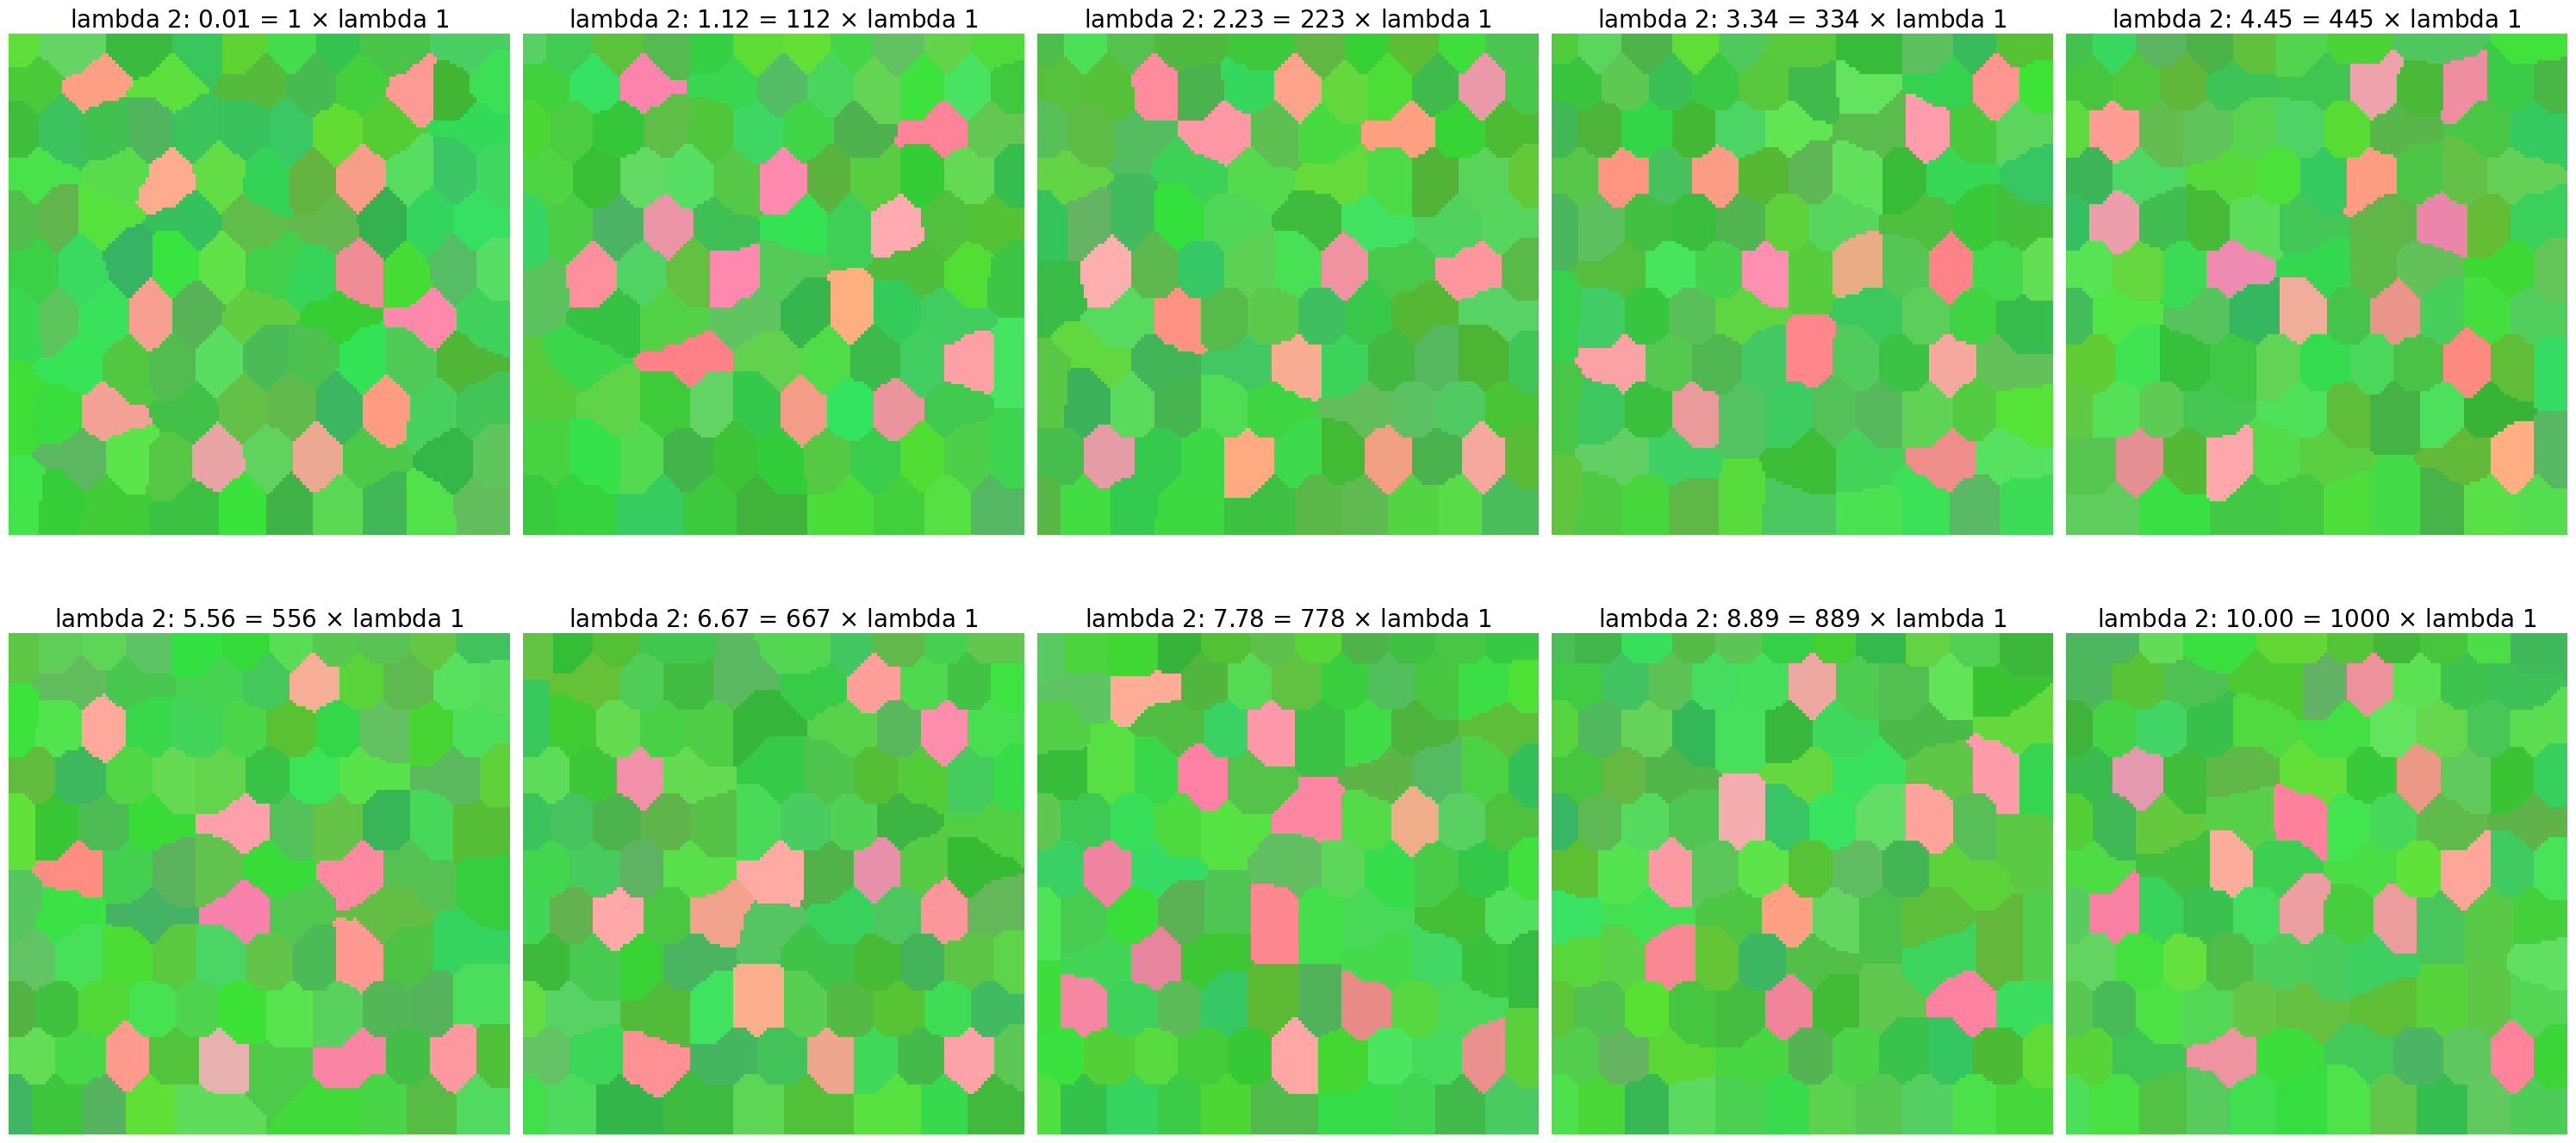

In [19]:
plot_sweep_configs(GRIDS_PER_HEX, TYPES_PER_HEX, beta_2_hex, param_1=0.01, param_1_name="lambda 1", param_2_name="lambda 2")